## DATA PREPROCESSING

### IMPORTING LIBRARIES

In [34]:
# Importing numpy
import numpy as np

# Importing pandas
import pandas as pd

# Importing matplotlib.pyplot
import matplotlib.pyplot as plt

# Importing seaborn
import seaborn as sns

# Importing warnings
import warnings

# Ignoring warnings
warnings.filterwarnings('ignore')

# Importing MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

# Importing ColumnTransformer from sklearn.compose
from sklearn.compose import ColumnTransformer

# Importing pickle
import pickle

### LOADING DATA

In [35]:
# Loading data using pandas
data=pd.read_excel('raw_data.xls')

# data
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


### DATA PREPROCESSING

In [36]:
# Extracting numerical columns from the data
data_num=data.select_dtypes('number')

# Numerical data
data_num

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,1,4,71,4,2,4,1,20,2,6,3,3,6,5,0,4,4
1196,37,10,2,4,80,4,1,4,3,17,1,4,2,3,1,0,0,0,3
1197,50,28,1,4,74,4,1,3,1,11,3,20,3,3,20,8,3,8,3
1198,34,9,3,4,46,2,3,2,1,14,2,9,3,4,8,7,7,7,3


In [37]:
# Extracting categorical columns from the data 
data_cat=data.select_dtypes('object')

# Categorical data
data_cat

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,E1001009,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,E1001010,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...,...
1195,E100992,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,E100993,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,E100994,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,E100995,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


### Correlation

In [38]:
# Checking correlation of the numerical columns of the data
cor=data_num.corr()

# Correlation
cor

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


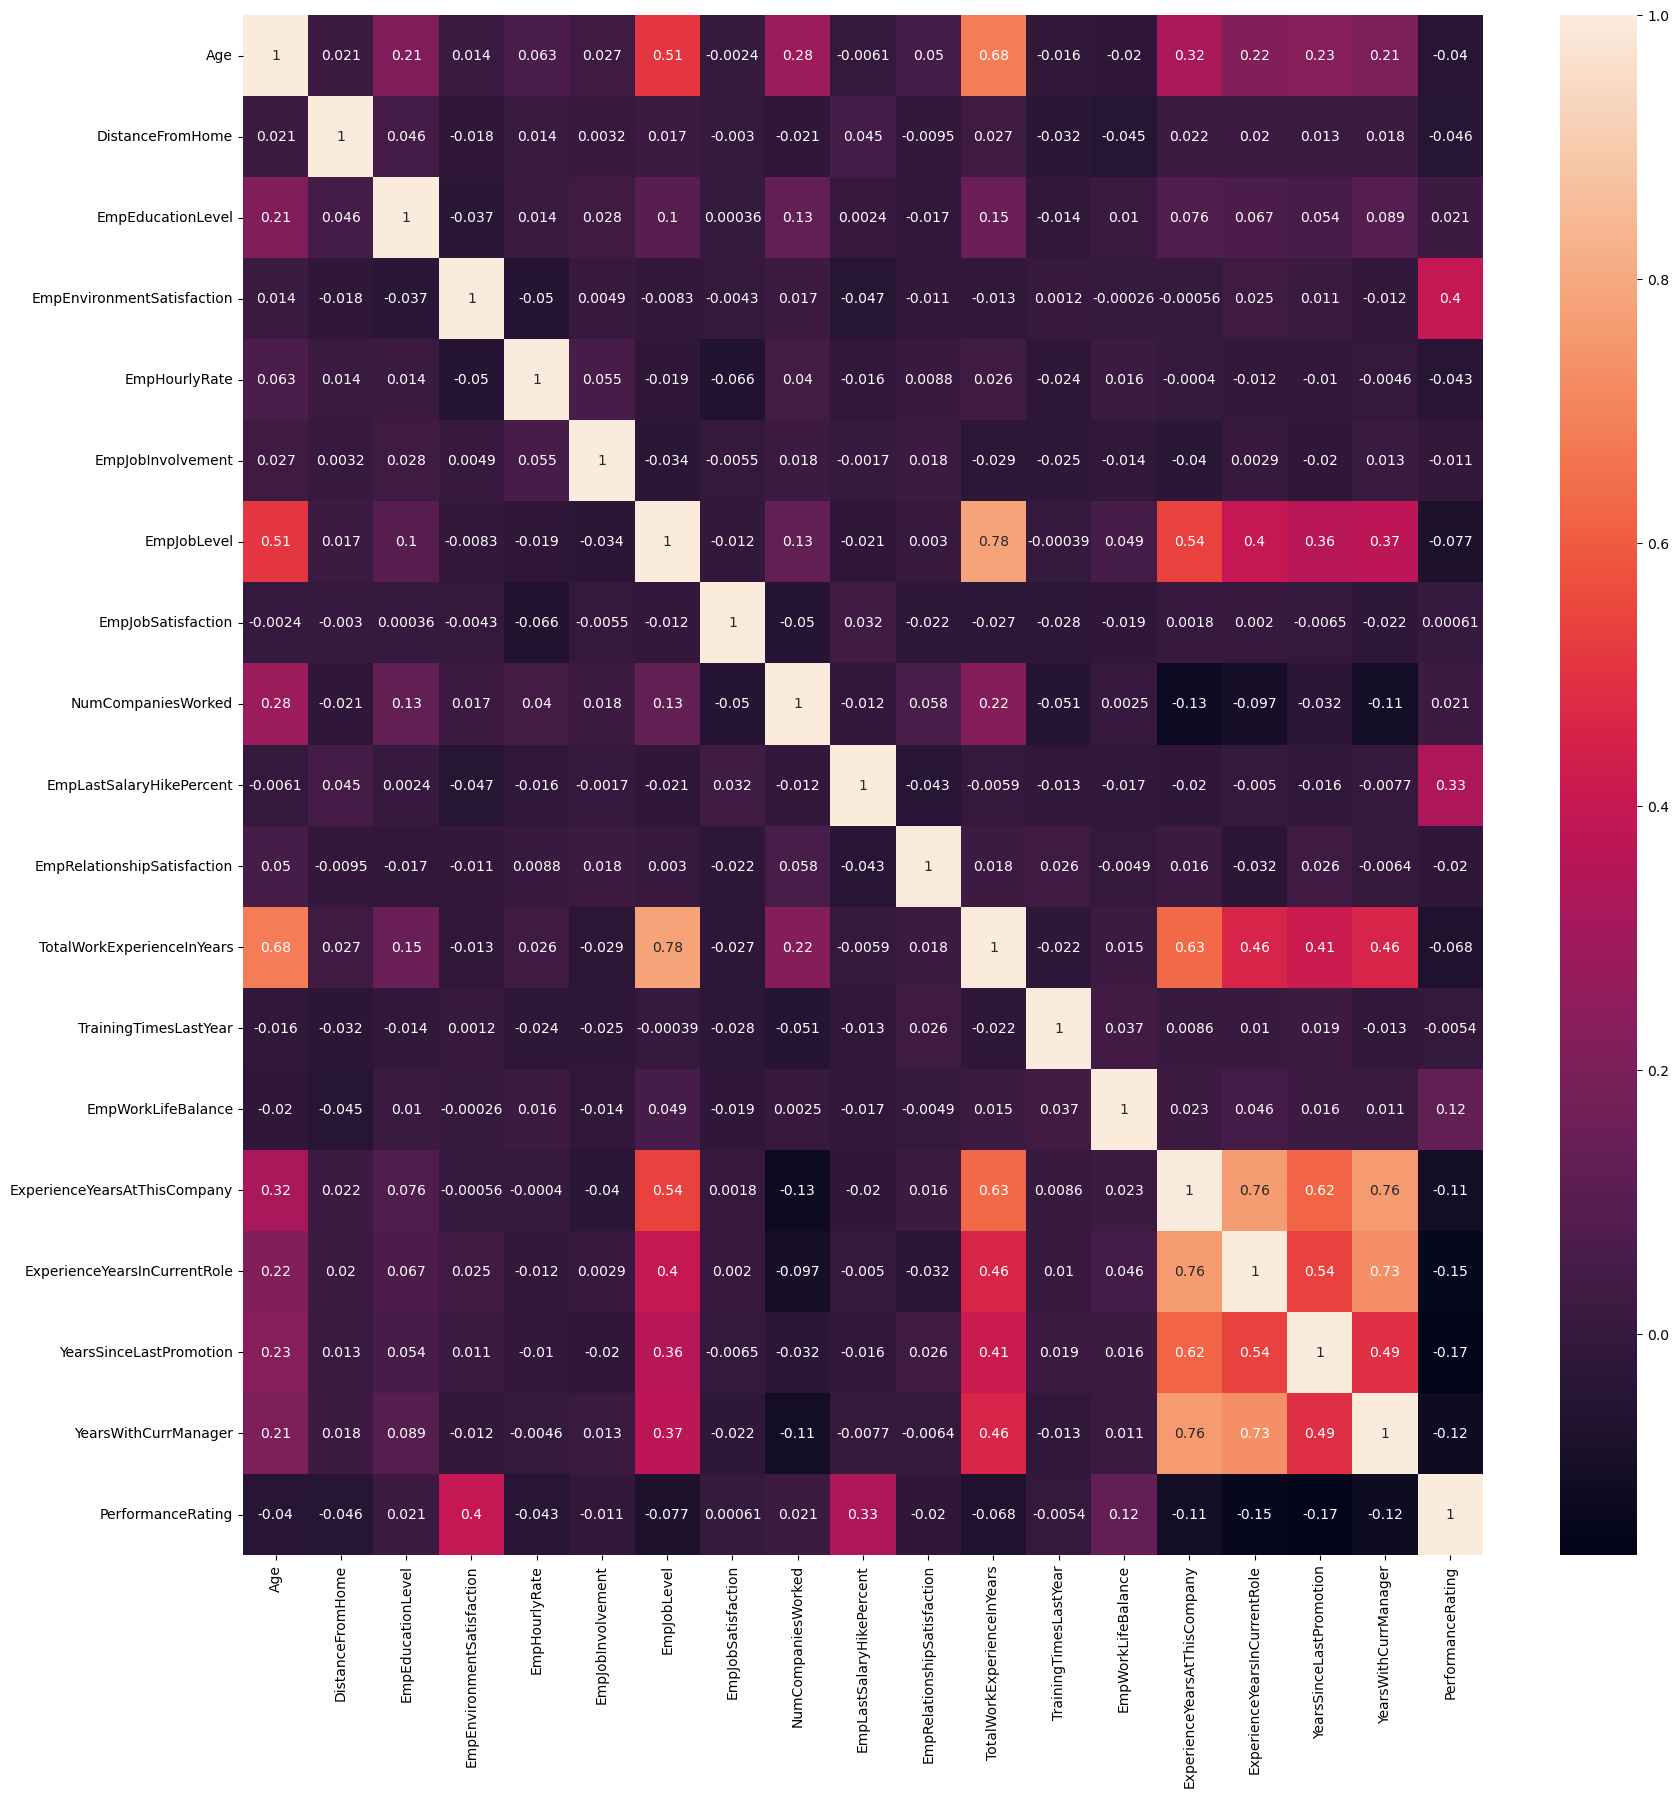

In [39]:
# Visualizing correlation of the numerical data using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)
plt.show()

###### Insights
There are no columns which are highly correlated with some other column. So, we will use every columns for training model

### Unnecesary columns

In [40]:
# Checking value counts for the 'EmpNumber' column
data['EmpNumber'].value_counts() 

EmpNumber
E1001000    1
E100346     1
E100342     1
E100341     1
E100340     1
           ..
E1001718    1
E1001717    1
E1001716    1
E1001713    1
E100998     1
Name: count, Length: 1200, dtype: int64

The column 'EmpNumber' contains unique values for all the rows. That is, There are 1200 rows in the data and 1200 unique values in the column 'EmpNumber'. So we will drop this column

In [41]:
# Creating list for the columns to be removed
drop_columns=['EmpNumber']
drop_columns

['EmpNumber']

### Continuous columns

In [42]:
# Creating list for the continuous columns
continuous_columns=['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

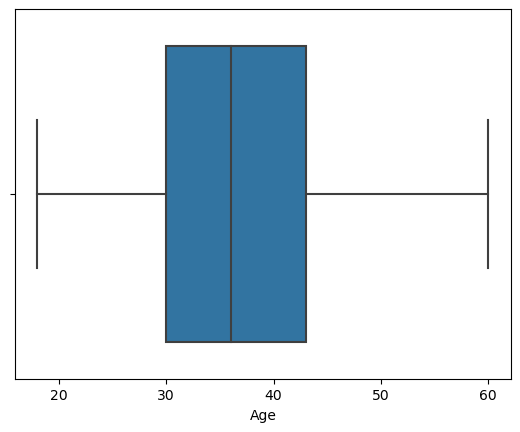

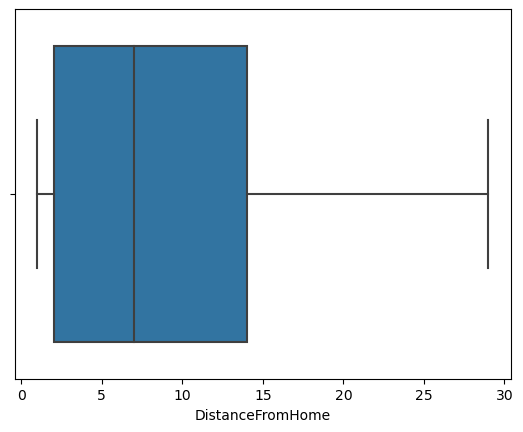

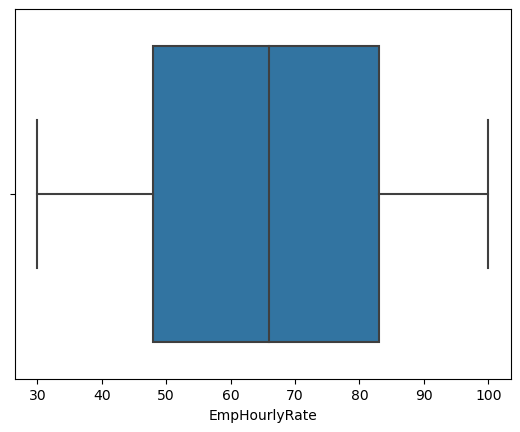

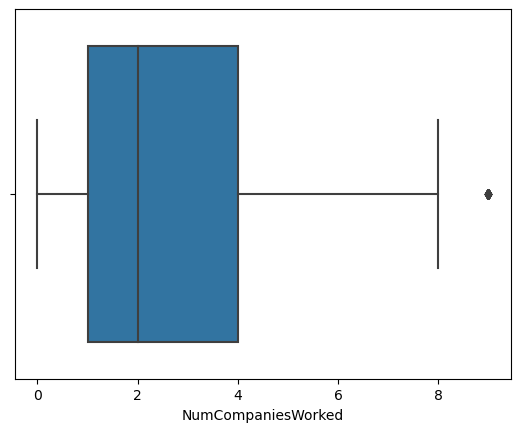

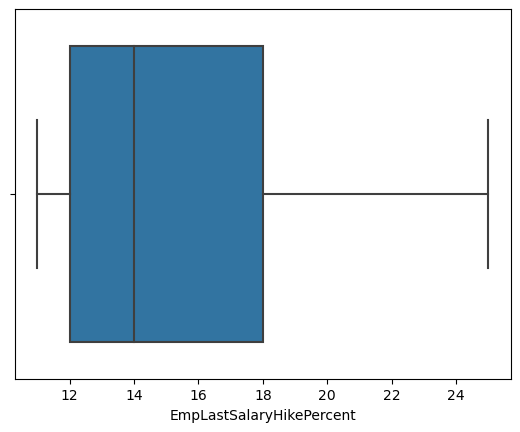

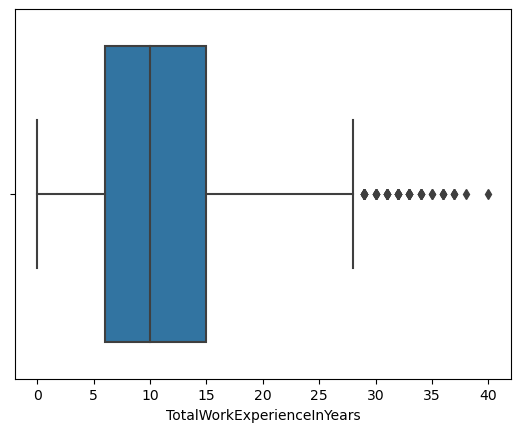

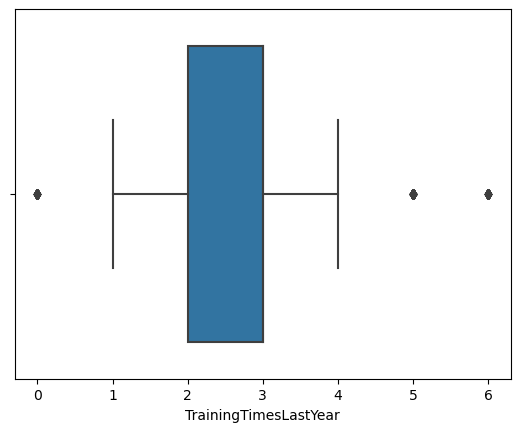

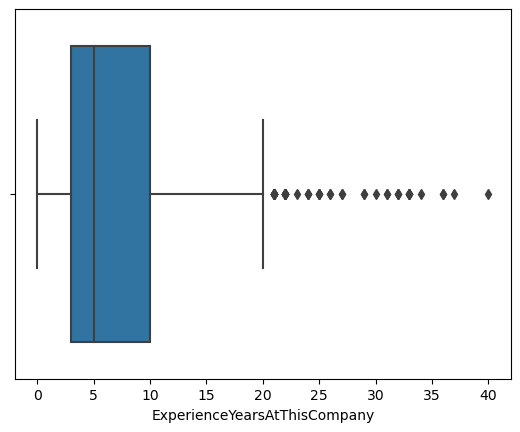

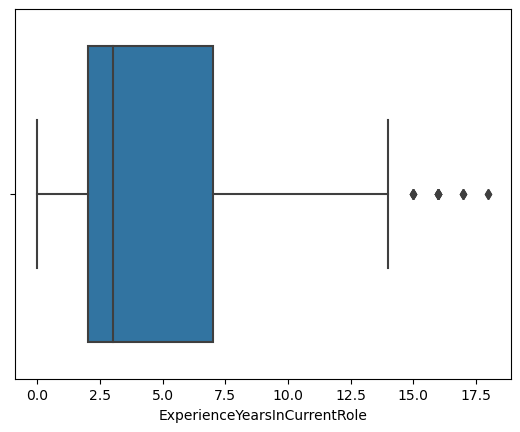

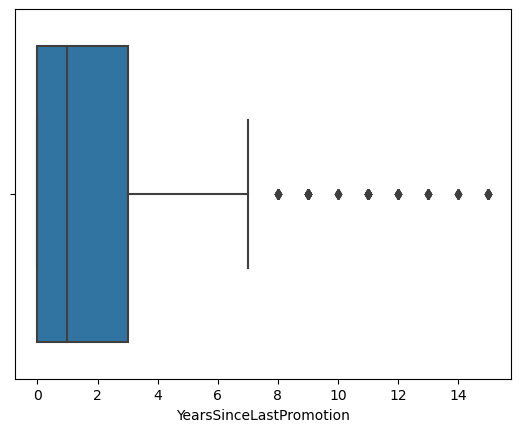

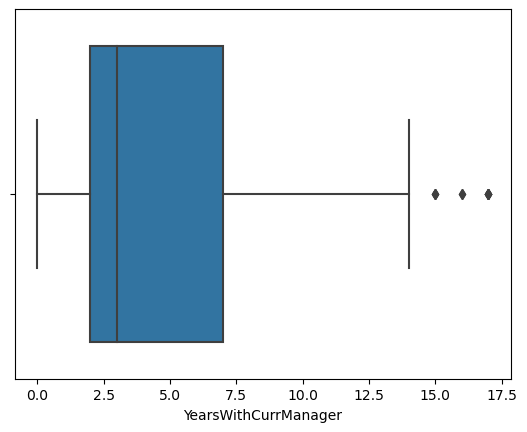

In [43]:
# Checking boxplot for the continuous columns of the data
for i in data[continuous_columns]:
    sns.boxplot(data,x=i)
    plt.show()

###### Insights
In boxplot, It shows there are some columns with outliers. But really they are not outliers. So, we won't handle outliers

###### The continuous columns in the data are
1. Age
2. DistanceFromHome
3. EmpHourlyRate
4. NumCompaniesWorked
5. EmpLastSalaryHikePercent
6. TotalWorkExperienceInYears
7. TrainingTimesLastYear
8. ExperienceYearsAtThisCompany
9. ExperienceYearsInCurrentRole
10. YearsSinceLastPromotion
11. YearsWithCurrManager

The distributions for the continuous columns are not normal. So we will normalize all the columns using MinMaxScaler. That is, scaling the continuous columns between 0 and 1
###### So, we will use MinMaxScaler to scale these columns

In [44]:
# Creating list of the columns for MinMaxScaling
minmaxscaling_columns=['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
minmaxscaling_columns

['Age',
 'DistanceFromHome',
 'EmpHourlyRate',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### Discrete columns

The discrete columns in the data are 
1. EmpEducationLevel
2. EmpEnvironmentSatisfaction
3. EmpJobInvolvement
4. EmpJobLevel
5. EmpJobSatisfaction
6. EmpRelationshipSatisfaction
7. EmpWorkLifeBalance

These discrete columns are in data type 'integer'. So we won't do anything in these columns
###### So, we will do nothing in these columns

In [45]:
# Creating list of columns for passthrough
passthrough_columns=['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction','EmpRelationshipSatisfaction','EmpWorkLifeBalance']
passthrough_columns

['EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'EmpRelationshipSatisfaction',
 'EmpWorkLifeBalance']

### Categorical columns

The columns 'Gender', 'OverTime' and 'Attrition' contains only two unique values. So, we will use 'OneHotEncoder' to encode these columns

In [46]:
# Creating list of columns for OneHotEncoding
onehotencoding_columns=['Gender','OverTime','Attrition']
onehotencoding_columns

['Gender', 'OverTime', 'Attrition']

The unique values in the columns 'EducationBackground', 'MaritalStatus', 'EmpDepartment' and 'EmpJobRole' don't have natural order. We will label the unique values with equal preference. So, we will use LabelEncoder to encode these columns   

In [47]:
# Creating list of columns for LabelEncoding
labelencoding_columns=['EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole']

In [48]:
# Creating class 'ModifiedLabelEncoder' for LabelEncoding
class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)

    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

The unique values in the column 'BusinessTravelFrequency' have natural order. So, we will use OrdinalEncoder to encode these columns   

In [49]:
# Creating list of columns for OrdinalEncoding
ordinalencoding_columns=['BusinessTravelFrequency']
ordinalencoding_columns

['BusinessTravelFrequency']

### Creating Preprocessing Pipeline

In [50]:
# Creating list of tuples for transformers in ColumnTransformer 
transformers=[('drop_columns','drop',drop_columns),
             ('minmaxscaling_columns',MinMaxScaler(),minmaxscaling_columns),
             ('passthrough_columns','passthrough',passthrough_columns),
             ('onehotencoding_columns',OneHotEncoder(drop='first'),onehotencoding_columns),
             ('EducationBackground',ModifiedLabelEncoder(),['EducationBackground']),
             ('MaritalStatus',ModifiedLabelEncoder(),['MaritalStatus']),
             ('EmpDepartment',ModifiedLabelEncoder(),['EmpDepartment']),
             ('EmpJobRole',ModifiedLabelEncoder(),['EmpJobRole']),
             ('ordinalencoding_columns',OrdinalEncoder(),ordinalencoding_columns)
             ]

In [51]:
# Initializing ColumnTransformer 
preprocessor=ColumnTransformer(transformers=transformers)

In [52]:
# preprocessor
preprocessor

ColumnTransformer(transformers=[('drop_columns', 'drop', ['EmpNumber']),
                                ('minmaxscaling_columns', MinMaxScaler(),
                                 ['Age', 'DistanceFromHome', 'EmpHourlyRate',
                                  'NumCompaniesWorked',
                                  'EmpLastSalaryHikePercent',
                                  'TotalWorkExperienceInYears',
                                  'TrainingTimesLastYear',
                                  'ExperienceYearsAtThisCompany',
                                  'ExperienceYearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWit...
                                 ['Gender', 'OverTime', 'Attrition']),
                                ('EducationBackground', ModifiedLabelEncoder(),
                                 ['EducationBackground']),
                                ('MaritalStatus', ModifiedLabelEncoder(),
                                 ['MaritalStatus']),
                                ('EmpDepartment', ModifiedLabelEncoder(),
                                 ['EmpDepartment']),
                                ('EmpJobRole', ModifiedLabelEncoder(),
                                 ['EmpJobRole']),
                                ('ordinalencoding_columns', OrdinalEncoder(),
                                 ['BusinessTravelFrequency'])])

In [53]:
# Fitting data into the preprocessor 
preprocessor.fit(data)

ColumnTransformer(transformers=[('drop_columns', 'drop', ['EmpNumber']),
                                ('minmaxscaling_columns', MinMaxScaler(),
                                 ['Age', 'DistanceFromHome', 'EmpHourlyRate',
                                  'NumCompaniesWorked',
                                  'EmpLastSalaryHikePercent',
                                  'TotalWorkExperienceInYears',
                                  'TrainingTimesLastYear',
                                  'ExperienceYearsAtThisCompany',
                                  'ExperienceYearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWit...
                                 ['Gender', 'OverTime', 'Attrition']),
                                ('EducationBackground', ModifiedLabelEncoder(),
                                 ['EducationBackground']),
                                ('MaritalStatus', ModifiedLabelEncoder(),
                                 ['MaritalStatus']),
                                ('EmpDepartment', ModifiedLabelEncoder(),
                                 ['EmpDepartment']),
                                ('EmpJobRole', ModifiedLabelEncoder(),
                                 ['EmpJobRole']),
                                ('ordinalencoding_columns', OrdinalEncoder(),
                                 ['BusinessTravelFrequency'])])

In [54]:
# Dumping preprocessor into the file 'pipeline.pkl'
with open('pipeline.pkl','wb') as file:
    pickle.dump(preprocessor,file)

We will use the pickle file 'pipeline.pkl' to preprocess the raw data in future.